In [57]:
%%file piecew.m
function y = piecew(t);

if t >= 0 && t < 15
    y = (38.1454 * t) + (0.31743 * (t^3));
elseif t >= 15 && t <= 33
    y = 1036 + (130.909 * (t-15)) + (6.18425 * (t-15)^2) - (0.428 * (t-15)^3);
elseif t > 33  
    y = 2900 - (62.468 * (t-33)) - (16.9274 * (t-33)^2) - (0.41796 * (t-33)^3);
else
    y = 0;
end

Created file 'C:\Users\user\Documents\MATLAB\assignments\uts\piecew.m'.


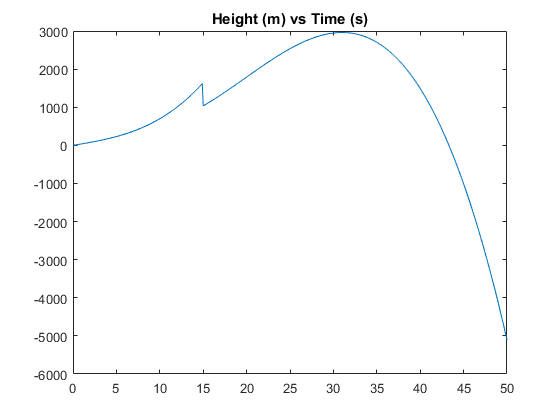

In [58]:
% soal 1
T = [];
Y = [];

for t = 0:0.1:50
    T = [T, t];
    Ytemp = piecew(t);
    Y = [Y, Ytemp]; 
end

plot(T, Y);
title('Height (m) vs Time (s)');

In [9]:
% soal 2
miu0 = 0.13; % meter squared
ni = 6.21 * (10^3); % 1 / meter cubic
q = 1.6 * (10^-19); % c
T0 = 300; % Kelvin
T = 1000; % Kelvin
rho = 6 * (10^4); % V s m /C

miu = miu0 * (T/T0)^(-2.42);
n = 1 / (rho * q * miu);

% Penyederhanaan dari rumus di soal didapatkan
N = ((n^2) + (ni^2)) / n



N =

   1.4762e+16




In [21]:
%%file leastsquare.m
function r = leastsquare(x,y, N);
    x2=x*x';
    xiyi=x*y';

    sumx=sum(x);
    sumy=sum(y);
    sumxiyi=sum(xiyi);
    sumx2=sum(x2);
    sumx22=sumx*sumx';

    num=N*sumxiyi-sumx*sumy;
    den=N*sumx2-sumx22;

    r=num/den;
end;

Created file 'C:\Users\user\Documents\MATLAB\assignments\uts\leastsquare.m'.



K1 =

  117.1606


K2 =

  180.2269




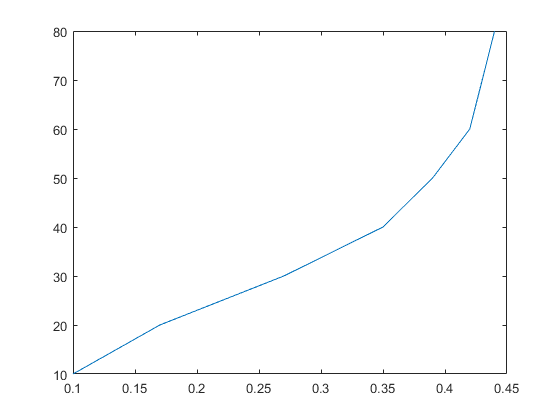

In [26]:
% soal 4
X = [0.10 0.17 0.27 0.35 0.39 0.42 0.43 0.44];
F = [10 20 30 40 50 60 70 80];

plot(X, F);

% least square hanya berlaku di rentang 0.1<=x<=0.35
N = 4;
x1 = X(1:N);
y1 = F(1:N);

K1 = leastsquare(x1, y1, N)

% least square pada semua rentang
N = length(X);
x2 = X(1:N);
y2 = F(1:N);

K2 = leastsquare(x2, y2, N)

In [27]:
%%file findinverse.m
function [E,P,S,Inverse] = findinverse(A)

[m,n] = size(A);
if (m ~= n)
    display('Matriks harus matriks square')
    return
else
end
x = 1;
for j = 1:1:n-1,
    for i = j+1:1:m,
        E(:,:,x) = eye(n);
        E(i,j,x) = -A(i,j) / A(j,j);
        A = E(:,:,x) * A;
        x = x + 1;
    end
end
x = 1;
for j = n:-1:2,
    for i = j-1:-1:1,
        P(:,:,x) = eye(n);
        P(i,j,x) = -A(i,j) / A(j,j);
        A = P(:,:,x) * A;
        x = x + 1;
    end
end
for i = 1:1:n,
    S(:,:,i) = eye(n);
    S(i,i,i) = 1 / A(i,i);
    A = S(:,:,i) * A;
end

ProdE = 1;
[~,~,c] = size(E);
for ii = c:-1:1,
    ProdE = ProdE * E(:,:,ii);
end
ProdP = 1;
[~,~,c] = size(P);
for ii = c:-1:1,
    ProdP = ProdP * P(:,:,ii);
end
ProdS = 1;
[~,~,d] = size(S);
for jj = d:-1:1,
    ProdS = ProdS * S(:,:,jj);
end
Inverse = ProdS*ProdP*ProdE;
end

Created file 'C:\Users\user\Documents\MATLAB\assignments\uts\findinverse.m'.


In [28]:
% soal 6
M = [4 17 24 5 12
     13 6 19 7 11
     25 20 1 14 22
     2 9 8 21 10
     3 15 18 16 23];
     
[E, P, S, Inverse] = findinverse(M);
Inverse


Inverse =

   -0.0083    0.0460    0.0220    0.0022   -0.0397
    0.0787   -0.0691    0.0269    0.0181   -0.0416
    0.0172    0.0379   -0.0218    0.0038   -0.0079
   -0.0137    0.0094   -0.0056    0.0679   -0.0216
   -0.0542    0.0028    0.0005   -0.0623    0.0970




In [51]:
%%file func.m
function f=func(x);
f=[3*x(1)-cos(x(2)*x(3))-(1/2) 
    4*x(1)^2+(625*(x(2)^2))+2*(x(2))-1
    20*x(3)+exp(-(x(1)*x(2)))+((10*pi-3)/3)]
end

Created file 'C:\Users\user\Documents\MATLAB\assignments\uts\func.m'.


In [55]:
%%file jacobian.m
function J=jacobian(x); 
J=[3 x(3)*sin(x(2)*x(3)) x(2)*sin(x(2)*x(3))
    8*x(1) (-1250*x(2))+2 0
    x(2)*(-1)*exp(-x(1)*x(2)) x(1)*(-1)*exp(-x(1)*x(2)) 20]
end

Created file 'C:\Users\user\Documents\MATLAB\assignments\uts\jacobian.m'.


In [56]:
clear all
close
clc

tolerance = 1e-10;
xlama = [ 1 ; 2 ; 1 ];


for i = 1:5000
    if det(jacobian(xlama )) == 0
        xlama = xlama + 1e-6;
    end
    
    xbaru = xlama - inv(jacobian(xlama))*func(xlama);
    
    abserr = abs(xlama - xbaru);
    relerr = abs((xlama - xbaru) / xbaru);

    if abserr < tolerance & relerr < tolerance
        break;
    end

    xlama = xbaru;
end


x=[xbaru(1) xbaru(2) xbaru(3)]


J =

   1.0e+03 *

    0.0030    0.0009    0.0018
    0.0080   -2.4980         0
   -0.0003   -0.0001    0.0200


J =

   1.0e+03 *

    0.0030    0.0009    0.0018
    0.0080   -2.4980         0
   -0.0003   -0.0001    0.0200


f =

   1.0e+03 *

    0.0029
    2.5070
    0.0296


J =

   1.0e+03 *

    0.0030    0.0005   -0.0030
    0.0050   -3.7510         0
   -0.0005   -0.0001    0.0200


J =

   1.0e+03 *

    0.0030    0.0005   -0.0030
    0.0050   -3.7510         0
   -0.0005   -0.0001    0.0200


f =

   1.0e+03 *

    0.0012
    5.6405
    0.0001


J =

   1.0e+03 *

    0.0030    0.0004   -0.0036
   -0.0003   -5.6296         0
   -0.0053    0.0000    0.0200


J =

   1.0e+03 *

    0.0030    0.0004   -0.0036
   -0.0003   -5.6296         0
   -0.0053    0.0000    0.0200


f =

   1.0e+04 *

   -0.0000
    1.2694
    0.0001


J =

   1.0e+03 *

    0.0030   -0.0007    0.0067
   -0.0044   -8.4482         0
   -0.2808    0.0229    0.0200


J =

   1.0e+03 *

    0.0030   -0.0007